# 1. Introduction

In this lesson, we will lean how to aggregate data with Pandas.

We will learn different techniques for aggregating data. and we will build some intuition around the groupby operation.

We will work with the World Happines Report which assigns each country a happiness score based on poll results.

Using that data, we will try to answer the following questions:

1. How can aggregating the data give us more insight into happiness scores?
2. How did world happiness change from 2015 to 2017?
3. Which factors contribute the most to the happiness score?

# 2. Introduction to the Data

In [1]:
import pandas as pd

happiness2015=pd.read_csv("2015.csv")

first_5=happiness2015[:5]

first_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        5 non-null      object 
 1   Region                         5 non-null      object 
 2   Happiness Rank                 5 non-null      int64  
 3   Happiness Score                5 non-null      float64
 4   Standard Error                 5 non-null      float64
 5   Economy (GDP per Capita)       5 non-null      float64
 6   Family                         5 non-null      float64
 7   Health (Life Expectancy)       5 non-null      float64
 8   Freedom                        5 non-null      float64
 9   Trust (Government Corruption)  5 non-null      float64
 10  Generosity                     5 non-null      float64
 11  Dystopia Residual              5 non-null      float64
dtypes: float64(9), int64(1), object(2)
memory usage: 608.0

# 3. Using Loops to Aggregate Data

<AxesSubplot:title={'center':'Happiness Scores'}>

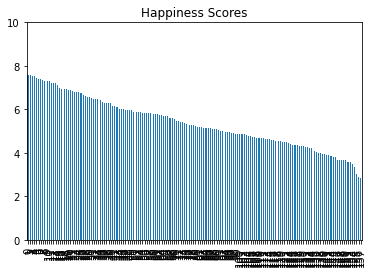

In [2]:
happiness2015['Happiness Score'].plot(kind='bar', title='Happiness Scores', ylim=(0,10))

In [3]:
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

<AxesSubplot:title={'center':'Southern Asia Happiness Scores'}, ylabel='Country'>

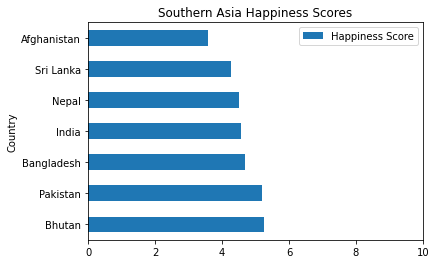

In [4]:
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))

In [5]:
mean_happiness={}

print(happiness2015["Region"].unique())

for region in happiness2015["Region"].unique():
    region_group=happiness2015[happiness2015["Region"]==region]
    region_mean=region_group["Happiness Score"].mean()
    mean_happiness[region]=region_mean
    
print(mean_happiness)

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']
{'Western Europe': 6.689619047619048, 'North America': 7.273, 'Australia and New Zealand': 7.285, 'Middle East and Northern Africa': 5.406899999999999, 'Latin America and Caribbean': 6.144681818181818, 'Southeastern Asia': 5.317444444444445, 'Central and Eastern Europe': 5.332931034482758, 'Eastern Asia': 5.626166666666666, 'Sub-Saharan Africa': 4.202800000000001, 'Southern Asia': 4.580857142857143}


So above we split the dataframe into different groups, applied a functino to each group, and then combined the results into a data structure.

# 4. The GroupBy Operation

Pandas has a prebuilt operation for the process that we performed above. The groupby operation performs the split-apply-combine process on a dataframe, however it does it in two steps.

# 5. Creating GroupBy Objects

In [6]:
grouped=happiness2015.groupby("Region")
print(grouped)
aus_nz=grouped.get_group("Australia and New Zealand")
print(aus_nz)

       Country                     Region  Happiness Rank  Happiness Score  \
8  New Zealand  Australia and New Zealand               9            7.286   
9    Australia  Australia and New Zealand              10            7.284   

   Standard Error  Economy (GDP per Capita)   Family  \
8         0.03371                   1.25018  1.31967   
9         0.04083                   1.33358  1.30923   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
8                   0.90837  0.63938                        0.42922   
9                   0.93156  0.65124                        0.35637   

   Generosity  Dystopia Residual  
8     0.47501            2.26425  
9     0.43562            2.26646  


# 6. Exploring GroupBy Objects

In [7]:
grouped = happiness2015.groupby('Region')

print(grouped.groups)



{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'), 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
             72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
            126, 129, 133],
           dtype='int64'), 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'), 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
             47,  50,  52,  56,  57,  64,  97, 104, 118],
           dtype='int64'), 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
            106, 107, 109, 111, 134, 135, 155],
           dtype='int64'), 'North America': Int64Index([4, 14], dtype='int64'), 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'), 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'), 'Sub-Saharan Africa': Int64